# Regularized Method for Regression

## Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

(0.025118864315095822,
 3.9810717055349695e-11,
 -198.10222658699666,
 296.5051902131072)

# Outliers Impact

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression

Coefficient EstimateL  [0.47134857]


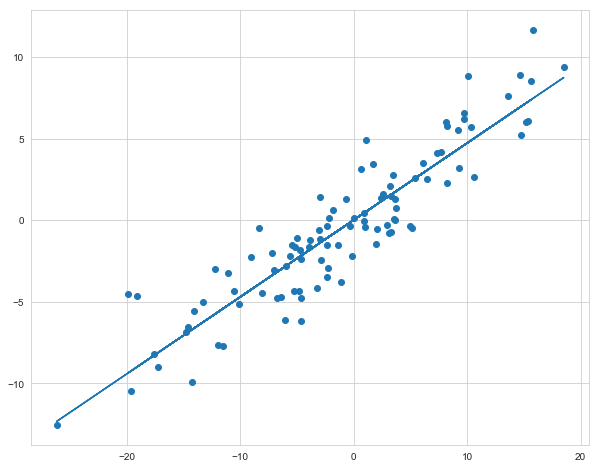

In [4]:
np.random.seed(42)
n_samples = 100
lr = LinearRegression()
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen)
plt.plot(rng, model_pred)
print("Coefficient EstimateL ", lr.coef_)

In [5]:
idx = rng.argmax()
y_gen[idx] = 200

Coefficient Estimate:  [0.92796845]


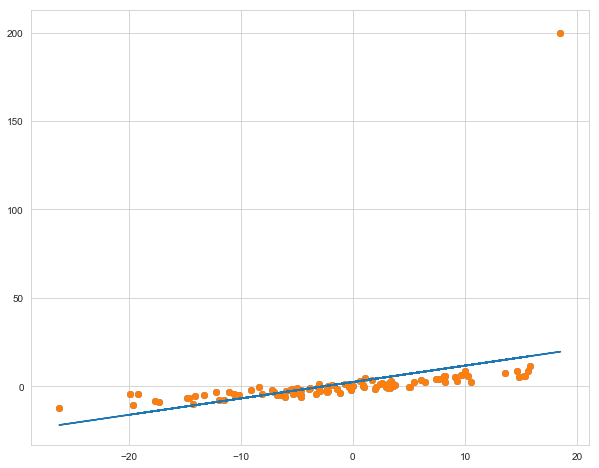

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(rng, y_gen)
o_lr = LinearRegression(normalize=True)
o_lr.fit(rng.reshape(-1,1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1,1))

plt.scatter(rng, y_gen)
plt.plot(rng, o_model_pred)

print("Coefficient Estimate: ", o_lr.coef_)

# Ridge Regression

In [7]:
from sklearn.linear_model import Ridge

Coefficient Estimate:  [0.46398423]


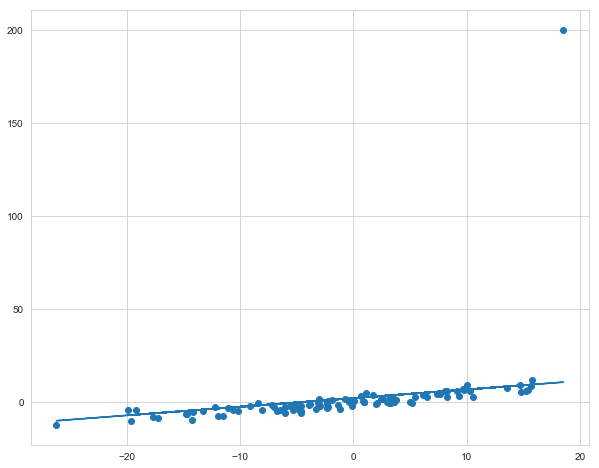

In [8]:
ridge_mod = Ridge(alpha=1, normalize=True)
ridge_mod.fit(rng.reshape(-1,1), y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen)
plt.plot(rng, ridge_model_pred)
print("Coefficient Estimate: ", ridge_mod.coef_)

# Lasso Regression

In [9]:
from sklearn.linear_model import Lasso

Coefficient Estimate:  [0.48530263]


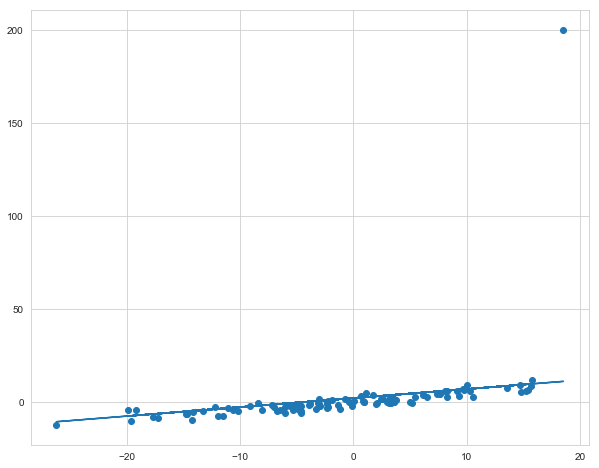

In [10]:
lasso_mod = Lasso(alpha=0.4, normalize=True)
lasso_mod.fit(rng.reshape(-1,1), y_gen)
lasso_model_pred = lasso_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen)
plt.plot(rng, lasso_model_pred)
print("Coefficient Estimate: ", lasso_mod.coef_)

# Elastic Net Regression

In [11]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [0.48316235]


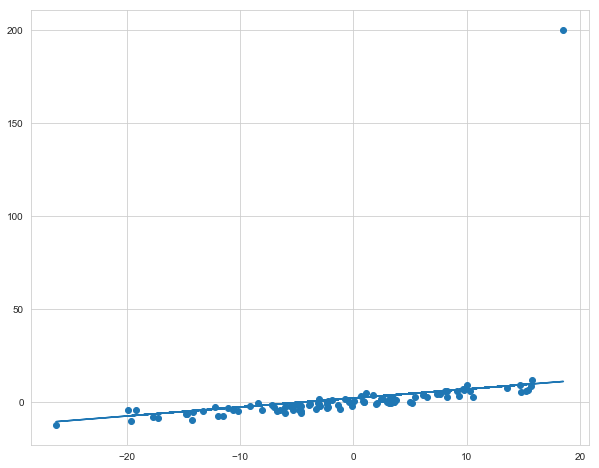

In [12]:
elastic_mod = ElasticNet(alpha=0.018, normalize=True)
elastic_mod.fit(rng.reshape(-1,1), y_gen)
elastic_model_pred = elastic_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen)
plt.plot(rng, elastic_model_pred)
print("Coefficient Estimate: ", elastic_mod.coef_)